In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#data
df = pd.read_csv('museum_visitors.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  59 non-null     datetime64[ns]
 1   Avila Adobe                           59 non-null     int64         
 2   Firehouse Museum                      59 non-null     int64         
 3   Chinese American Museum               59 non-null     int64         
 4   America Tropical Interpretive Center  59 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.4 KB


In [6]:
#Avila Adobe
avila_adobe = (df.groupby(df['Date'].dt.strftime('%Y'))['Avila Adobe'].sum())
avila_adobe = avila_adobe.to_frame()
avila_adobe['Date'] = avila_adobe.index
avila_adobe = avila_adobe.rename(columns={'Avila Adobe':'Visitors'})
avila_adobe

,Visitors,Date
Date,,
2014,333315,2014
2015,317517,2015
2016,280784,2016
2017,270314,2017
2018,217708,2018


In [7]:
#Firehouse Museum
firehouse_museum = (df.groupby(df['Date'].dt.strftime('%Y'))['Firehouse Museum'].sum())
firehouse_museum = firehouse_museum.to_frame()
firehouse_museum['Date'] = firehouse_museum.index
firehouse_museum = firehouse_museum.rename(columns={'Firehouse Museum':'Visitors'})
firehouse_museum

,Visitors,Date
Date,,
2014,129338,2014
2015,75367,2015
2016,64633,2016
2017,60218,2017
2018,52341,2018


In [8]:
#Chinese American Museum
ca_museum = (df.groupby(df['Date'].dt.strftime('%Y'))['Chinese American Museum'].sum())
ca_museum = ca_museum.to_frame()
ca_museum['Date'] = ca_museum.index
ca_museum = ca_museum.rename(columns={'Chinese American Museum':'Visitors'})
ca_museum

,Visitors,Date
Date,,
2014,25304,2014
2015,29359,2015
2016,37284,2016
2017,36739,2017
2018,31868,2018


In [9]:
#Total Visitor Dataframe
tv_adobe = avila_adobe['Visitors']
tv_firehouse = firehouse_museum['Visitors']
tv_ca = ca_museum['Visitors']

In [10]:
#Checking Dataframe - Avila Adobe
tv_adobe = tv_adobe.to_frame()
tv_adobe = tv_adobe.rename(columns={'Visitors':'Avila Adobe Visitors'})
tv_adobe

,Avila Adobe Visitors
Date,
2014,333315
2015,317517
2016,280784
2017,270314
2018,217708


In [11]:
#Checking Dataframe - Firehouse
tv_firehouse = tv_firehouse.to_frame()
tv_firehouse = tv_firehouse.rename(columns={'Visitors':'Firehouse Museum Visitors'})
tv_firehouse

,Firehouse Museum Visitors
Date,
2014,129338
2015,75367
2016,64633
2017,60218
2018,52341


In [12]:
#Checking Dataframe - Chinese American
tv_ca = tv_ca.to_frame()
tv_ca = tv_ca.rename(columns={'Visitors':'Chinese American Visitors'})
tv_ca

,Chinese American Visitors
Date,
2014,25304
2015,29359
2016,37284
2017,36739
2018,31868


In [13]:
#merging
total_visitors = pd.concat([tv_adobe, tv_firehouse, tv_ca], axis=1)
total_visitors['Date'] = total_visitors.index
total_visitors

,Avila Adobe Visitors,Firehouse Museum Visitors,Chinese American Visitors,Date
Date,,,,
2014,333315,129338,25304,2014
2015,317517,75367,29359,2015
2016,280784,64633,37284,2016
2017,270314,60218,36739,2017
2018,217708,52341,31868,2018


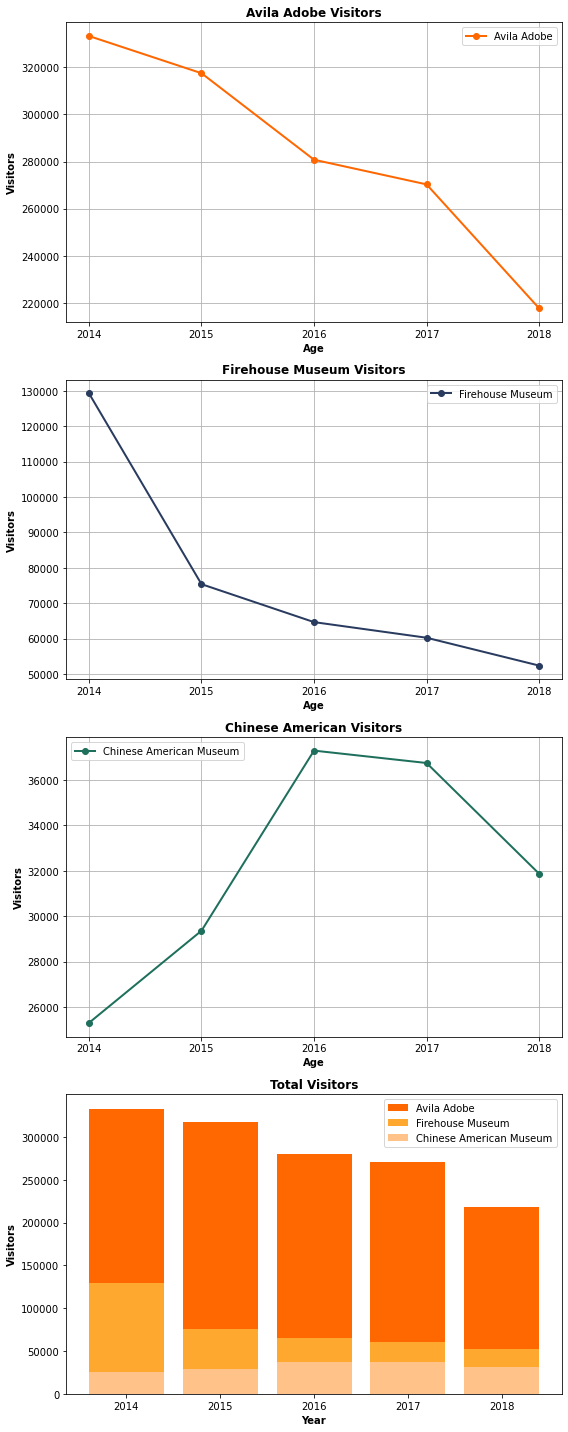

In [14]:
#style
plt.style.use('seaborn-bright')

#figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(8,20))


#plot
ax1.plot(avila_adobe['Date'], avila_adobe['Visitors'], 
         label='Avila Adobe', color='#FF6701', linewidth=2, marker='o')

ax2.plot(firehouse_museum['Date'], firehouse_museum['Visitors'], 
         label='Firehouse Museum', color='#293B5F', linewidth=2, marker='o')

ax3.plot(ca_museum['Date'], ca_museum['Visitors'], 
         label='Chinese American Museum', color='#1E6F5C', linewidth=2, marker='o')

ax4.bar(total_visitors['Date'], total_visitors['Avila Adobe Visitors'], 
        color='#FF6701', label = 'Avila Adobe')

ax4.bar(total_visitors['Date'], total_visitors['Firehouse Museum Visitors'], 
        color='#FEA82F', label = 'Firehouse Museum')

ax4.bar(total_visitors['Date'], total_visitors['Chinese American Visitors'], 
        color='#FFC288', label = 'Chinese American Museum')

#Avila Adobe
ax1.legend()
ax1.set_title('Avila Adobe Visitors', fontweight='bold')
ax1.set_xlabel('Age', fontweight='bold')
ax1.set_ylabel('Visitors', fontweight='bold')
ax1.grid()

#Firehouse Museum
ax2.legend()
ax2.set_title('Firehouse Museum Visitors', fontweight='bold')
ax2.set_xlabel('Age', fontweight='bold')
ax2.set_ylabel('Visitors', fontweight='bold')
ax2.grid()

#Chinese American Museum
ax3.legend()
ax3.set_title('Chinese American Visitors', fontweight='bold')
ax3.set_xlabel('Age', fontweight='bold')
ax3.set_ylabel('Visitors', fontweight='bold')
ax3.grid()

#Total Visitor
ax4.legend()
ax4.set_title('Total Visitors', fontweight='bold')
ax4.set_xlabel('Year', fontweight='bold')
ax4.set_ylabel('Visitors', fontweight='bold')

plt.tight_layout()
plt.show()